In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [104]:
# Load dataset
df = pd.read_csv('OSBS_datasets/Cleaned_data/final_cleaned_dataset_V1.csv', parse_dates=['datetime'])

In [66]:
df.head()

,datetime,soilCO2concentrationMean,soilCO2concentrationMinimum,soilCO2concentrationMaximum,soilCO2concentrationVariance,soilTempMean,soilTempMinimum,soilTempMaximum,soilTempVariance,VSWCMean,...,RHVariance,tempRHMean,tempRHMinimum,tempRHMaximum,tempRHVariance,dewTempMean,dewTempMinimum,dewTempMaximum,dewTempVariance,TFPrecipBulk
0,2021-01-01 00:00:00+00:00,1520.60,1511.08,1526.92,27.200,16.909,16.903,16.918,0.000022,0.0720,...,0.05,21.615,21.570,21.668,0.001,18.253,18.233,18.278,0.000,0.0
1,2021-01-01 00:01:00+00:00,1521.69,1508.72,1531.92,91.190,16.914,16.910,16.916,0.000005,0.0719,...,0.01,21.705,21.669,21.734,0.000,18.233,18.229,18.240,0.000,0.0
2,2021-01-01 00:02:00+00:00,1523.45,1512.77,1533.90,46.440,16.913,16.909,16.917,0.000009,0.0720,...,0.01,21.780,21.736,21.838,0.001,18.314,18.240,18.360,0.002,0.0
3,2021-01-01 00:03:00+00:00,1526.25,1515.16,1536.34,55.100,16.915,16.912,16.920,0.000008,0.0721,...,0.02,21.890,21.842,21.924,0.001,18.291,18.280,18.317,0.000,0.0
4,2021-01-01 00:04:00+00:00,1521.15,1518.53,1523.81,3.622,16.918,16.916,16.920,0.000002,0.0720,...,0.01,21.930,21.916,21.938,0.000,18.266,18.227,18.291,0.001,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193683 entries, 0 to 193682
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   datetime                      193683 non-null  datetime64[ns, UTC]
 1   soilCO2concentrationMean      193683 non-null  float64            
 2   soilCO2concentrationMinimum   193683 non-null  float64            
 3   soilCO2concentrationMaximum   193683 non-null  float64            
 4   soilCO2concentrationVariance  193683 non-null  float64            
 5   soilTempMean                  193683 non-null  float64            
 6   soilTempMinimum               193683 non-null  float64            
 7   soilTempMaximum               193683 non-null  float64            
 8   soilTempVariance              193683 non-null  float64            
 9   VSWCMean                      193683 non-null  float64            
 10  VSWCMinimum         

In [43]:
df.isnull().sum()

datetime                        0
soilCO2concentrationMean        0
soilCO2concentrationMinimum     0
soilCO2concentrationMaximum     0
soilCO2concentrationVariance    0
soilTempMean                    0
soilTempMinimum                 0
soilTempMaximum                 0
soilTempVariance                0
VSWCMean                        0
VSWCMinimum                     0
VSWCMaximum                     0
VSWCVariance                    0
VSICMean                        0
VSICMinimum                     0
VSICMaximum                     0
VSICVariance                    0
windSpeedMean                   0
windSpeedMinimum                0
windSpeedMaximum                0
windSpeedVariance               0
windDirMean                     0
windDirVariance                 0
RHMean                          0
RHMinimum                       0
RHMaximum                       0
RHVariance                      0
tempRHMean                      0
tempRHMinimum                   0
tempRHMaximum 

In [44]:
df["TFPrecipBulk"].max()

2.188

In [105]:
# Set datetime as index
df.set_index('datetime', inplace=True)

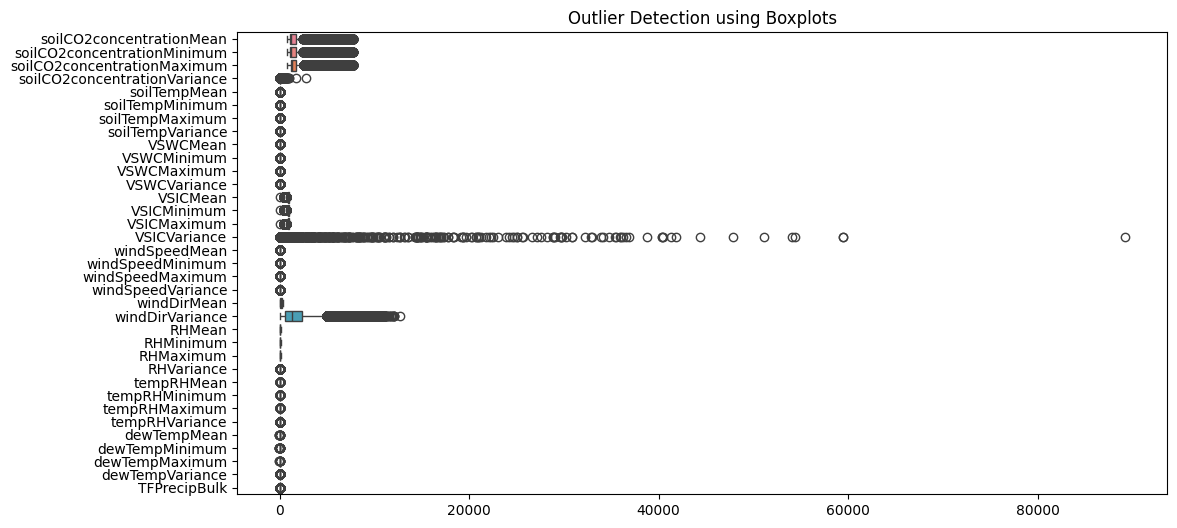

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Outlier Detection using Boxplots")
plt.show()


## Outlier removing IQR method

In [55]:
# def remove_outliers_iqr(df, cols):
#     for col in df.columns:
#         if col in cols:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower = Q1 - 1.5*IQR
#             upper = Q3 + 1.5*IQR
#             df[col] = np.clip(df[col], lower, upper)
#         else:
#             continue
#     return df
# # Columns to check for outliers
# max_outlier_cols = ["soilCO2concentrationMean","soilCO2concentrationMinimum","soilCO2concentrationMaximum","soilCO2concentrationVariance","VSICVariance","windDirVariance"]
# df = remove_outliers_iqr(df, outlier_cols)

## Outlier Removing Quantile Method

In [85]:
lower = df["TFPrecipBulk"].quantile(0.02)
upper = df["TFPrecipBulk"].quantile(1)
upper

2.188

In [106]:
max_outlier_cols = ["soilCO2concentrationMean","soilCO2concentrationMinimum","soilCO2concentrationMaximum","soilCO2concentrationVariance","VSICVariance","windDirVariance"]
for feature in max_outlier_cols:
    lower = df[feature].quantile(0.02)
    upper = df[feature].quantile(0.84)
    df[feature] = df[feature].clip(lower, upper)


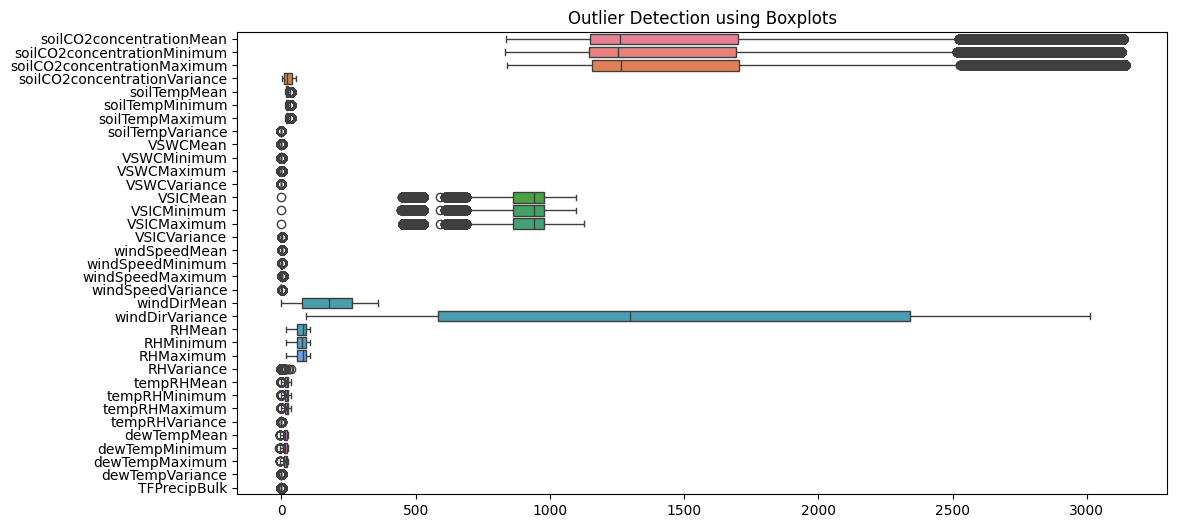

In [109]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Outlier Detection using Boxplots")
plt.show()


In [110]:
df.shape

(193683, 35)

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
soilCO2concentrationMean,193683.0,1615.088237,740.089504,835.6964,1.149815e+03,1259.140000,1698.640000,3133.304800
soilCO2concentrationMinimum,193683.0,1609.047808,739.256359,831.8700,1.144180e+03,1253.060000,1692.545000,3125.722000
soilCO2concentrationMaximum,193683.0,1621.293748,741.226742,839.6264,1.155375e+03,1265.200000,1704.785000,3141.818400
soilCO2concentrationVariance,193683.0,24.416326,16.842546,2.5100,1.026000e+01,19.350000,37.850000,52.640000
soilTempMean,193683.0,21.154075,4.144023,14.9740,1.866500e+01,19.377000,23.459000,37.114000
soilTempMinimum,193683.0,21.151233,4.142887,14.9670,1.866300e+01,19.376000,23.457000,37.112000
soilTempMaximum,193683.0,21.156912,4.145160,14.9760,1.866600e+01,19.378000,23.461000,37.115000
soilTempVariance,193683.0,0.000010,0.000036,0.0000,6.000000e-07,0.000002,0.000008,0.003206
VSWCMean,193683.0,0.056776,0.025004,0.0000,4.940000e-02,0.060700,0.068000,0.456300
VSWCMinimum,193683.0,0.056555,0.024819,0.0000,4.940000e-02,0.060400,0.067700,0.456300


# Rain flag for rain and no rain category

In [114]:
df["TFPrecip_flag"] = (df["TFPrecipBulk"] > 0).astype(int)

In [116]:
df["TFPrecip_flag"].unique()

array([0, 1])

# WIND DIRECTIONIS 0-360 so converting to sin and cos value 

In [117]:
rad = np.deg2rad(df['windDirMean'].fillna(0))
df['wind_sin'] = np.sin(rad); df['wind_cos'] = np.cos(rad)

In [119]:
# Identify columns by type (Mean, Min, Max, Variance)
mean_cols = [col for col in df.columns if 'Mean' in col]
min_cols = [col for col in df.columns if 'Minimum' in col]
max_cols = [col for col in df.columns if 'Maximum' in col]
var_cols = [col for col in df.columns if 'Variance' in col]
other_cols = [col for col in df.columns 
              if all(x not in col for x in ['Mean', 'Minimum', 'Maximum', 'Variance','flag'])]
categorical_col=["TFPrecip_flag"]
# Resample to 30-minute intervals
df_30min = pd.DataFrame()

In [120]:
# Compute mean, min, max, variance for each group of columns
df_30min[mean_cols] = df[mean_cols].resample('30min').mean()
df_30min[min_cols] = df[min_cols].resample('30min').min()
df_30min[max_cols] = df[max_cols].resample('30min').max()
df_30min[var_cols] = df[var_cols].resample('30min').var()
df_30min[other_cols]=df[other_cols].resample('30min').mean()
df_30min[categorical_col]=df[categorical_col].resample('30min').median()

# Reset index to make 'etime' a column again
df_30min = df_30min.reset_index()


In [121]:
df_30min.tail(10)

,datetime,soilCO2concentrationMean,soilTempMean,VSWCMean,VSICMean,windSpeedMean,windDirMean,RHMean,tempRHMean,dewTempMean,...,VSICVariance,windSpeedVariance,windDirVariance,RHVariance,tempRHVariance,dewTempVariance,TFPrecipBulk,wind_sin,wind_cos,TFPrecip_flag
8603,2021-06-29 05:30:00+00:00,3133.3048,26.264267,0.070057,886.173367,0.159500,66.285500,94.336667,22.957233,21.950867,...,0.000114,0.000009,9.566088e+05,3.333333e-06,0.000000e+00,0.000000e+00,0.0,0.391532,0.591356,0.0
8604,2021-06-29 06:00:00+00:00,3133.3048,26.081400,0.070000,886.246767,0.165833,73.954167,94.877667,22.862900,21.950967,...,0.000228,0.000017,6.524292e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.394802,0.592056,0.0
8605,2021-06-29 06:30:00+00:00,3133.3048,25.912467,0.069917,886.404900,0.140167,37.259500,95.715000,22.711167,21.944333,...,0.000074,0.000005,8.013751e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.234788,0.820860,0.0
8606,2021-06-29 07:00:00+00:00,3133.3048,25.766900,0.069817,886.496533,0.142333,58.227333,95.920667,22.636600,21.905500,...,0.000186,0.000036,1.080334e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.501804,0.639065,0.0
8607,2021-06-29 07:30:00+00:00,3133.3048,25.645467,0.069750,886.564733,0.085333,95.536500,93.890667,23.160233,22.073400,...,0.000126,0.000000,3.720481e+05,1.702299e-04,1.885057e-07,2.574713e-07,0.0,0.810613,-0.041731,0.0
8608,2021-06-29 08:00:00+00:00,3133.3048,25.534167,0.069700,886.772500,0.130500,139.771667,92.134000,23.635067,22.234333,...,0.000143,0.000000,7.657511e+05,1.006897e-04,6.436782e-08,0.000000e+00,0.0,0.067289,0.644549,0.0
8609,2021-06-29 08:30:00+00:00,3133.3048,25.418000,0.069607,886.899867,0.073500,268.586333,93.324000,23.556967,22.368400,...,0.000136,0.000000,1.296402e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-0.585227,0.348448,0.0
8610,2021-06-29 09:00:00+00:00,3133.3048,25.303467,0.069530,886.939567,0.098500,136.980000,93.681000,23.600300,22.473800,...,0.000352,0.000000,8.658151e+05,2.540230e-05,0.000000e+00,0.000000e+00,0.0,0.077192,0.590871,0.0
8611,2021-06-29 09:30:00+00:00,3133.3048,25.188833,0.069487,887.161433,0.156167,38.990167,96.685950,22.861312,22.255457,...,0.000222,0.000017,6.764551e+05,3.819308e-05,9.279162e-08,2.341492e-07,0.0,0.240466,0.825985,0.0
8612,2021-06-29 10:00:00+00:00,3133.3048,25.128500,0.069400,887.302000,0.145000,16.355000,96.459917,22.960529,22.283012,...,0.000968,0.000000,1.893586e+03,1.701389e-07,3.415067e-11,3.472222e-11,0.0,0.280954,0.957376,0.0


In [123]:
print("Resampling complete. Dataset shape:", df_30min.shape)


Resampling complete. Dataset shape: (8613, 39)


In [124]:
df_30min.isnull().sum()

datetime                           0
soilCO2concentrationMean        2042
soilTempMean                    2042
VSWCMean                        2042
VSICMean                        2042
windSpeedMean                   2042
windDirMean                     2042
RHMean                          2042
tempRHMean                      2042
dewTempMean                     2042
soilCO2concentrationMinimum     2042
soilTempMinimum                 2042
VSWCMinimum                     2042
VSICMinimum                     2042
windSpeedMinimum                2042
RHMinimum                       2042
tempRHMinimum                   2042
dewTempMinimum                  2042
soilCO2concentrationMaximum     2042
soilTempMaximum                 2042
VSWCMaximum                     2042
VSICMaximum                     2042
windSpeedMaximum                2042
RHMaximum                       2042
tempRHMaximum                   2042
dewTempMaximum                  2042
soilCO2concentrationVariance    2046
s

In [ ]:
# Optional: save to a new CSV
df_30min.to_csv('OSBS_datasets/Cleaned_data/NEON_30min_aggregated_data_V2.csv', index=False)